K_means explanation and examples: https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c#:~:text=K%2Dmeans%20is%20an%20unsupervised%20clustering%20algorithm%20designed%20to%20partition,classifies%20them%20together%20into%20clusters.

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

# Import the data

In [3]:
import xarray as xr
import numpy as np
import scipy.interpolate as interp
import pandas as pd
from sklearn.cluster import KMeans


import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [4]:
df_main = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_main.csv', index_col=0)
df_main.drop(df_main[df_main['Surge']==9].index, inplace = True)
df_main.drop(df_main[df_main['Surge']==1].index, inplace = True)
df_main.drop(df_main[df_main['Surge']==2].index, inplace = True)
df = df_main.drop(labels=['Name', 'rgiid'], axis=1)
df.columns

Index(['x', 'y', 'Surge', 'Slope', 'bed', 'thickness', 'surface_elevation',
       'ELA', 'beta', 'cmb', 'width_centerline'],
      dtype='object')

In [5]:
df.dropna(how='any', inplace=True)

In [5]:
np.any(np.isnan(df))

False

In [6]:
kmeans = KMeans(n_clusters=8).fit(df)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.67697978e+05 8.65359397e+06 3.98232816e-01 9.26764615e+00
  2.41665300e+02 7.64309708e+01 3.18096270e+02 5.13104547e+02
  4.27961349e-03 4.27961349e-03 1.96441522e+03]
 [4.56247576e+05 8.73459183e+06 2.78398681e-01 1.51021253e+01
  3.17449834e+02 5.97173561e+01 3.77167190e+02 5.90935523e+02
  5.14560834e-03 5.14560834e-03 1.02433625e+03]
 [6.42312722e+05 8.88711300e+06 3.57360541e-01 1.04482443e+01
  1.39590383e+02 2.09953591e+02 3.49543974e+02 4.26611662e+02
  3.49253837e-03 3.49253837e-03 6.00255322e+03]
 [5.10464319e+05 8.81136866e+06 9.45731366e-02 1.43315150e+01
  5.87700849e+02 4.90849651e+01 6.36785814e+02 6.79101890e+02
  3.62880117e-03 3.62880117e-03 9.96309606e+02]
 [5.24194064e+05 8.57123767e+06 5.90613780e-01 1.41802787e+01
  2.77949508e+02 6.92962608e+01 3.47245769e+02 4.93143044e+02
  5.78501445e-03 5.78501445e-03 9.93403301e+02]
 [5.31287711e+05 8.65519495e+06 3.60834739e-01 1.52119815e+01
  4.39058465e+02 3.82611123e+01 4.77319578e+02 5.94355049e+02
  4.90709896e-03

(0.0, 100000.0)

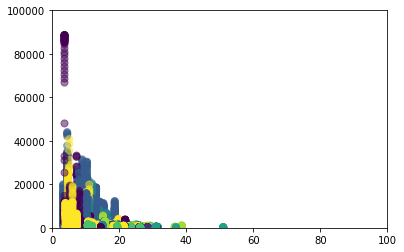

In [8]:
plt.scatter(df['Slope'], df['width_centerline'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlim([0, 100])
plt.ylim([0, 100000])

# Find the optimal number of clusters

In [9]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

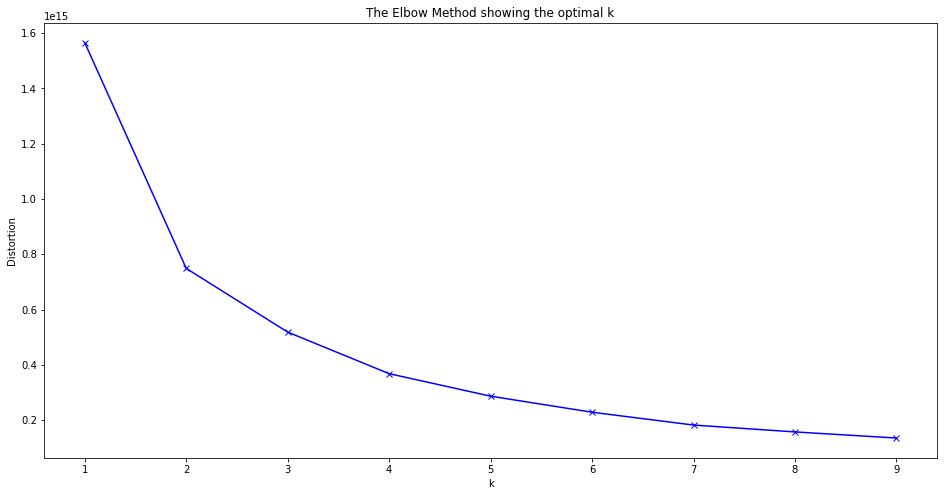

In [10]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [86]:
# df1 = df.drop(labels=['Surge'], axis=1)

(-100.0, 100000.0)

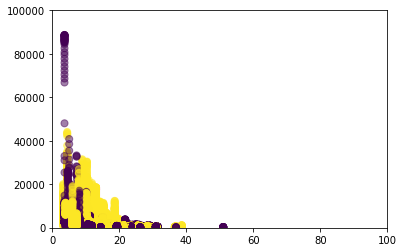

In [11]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
plt.scatter(df['Slope'], df['width_centerline'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlim([0, 100])
plt.ylim([-100, 100000])